In [1]:
import os

import pandas as pd

Average sentences per article: 17.449


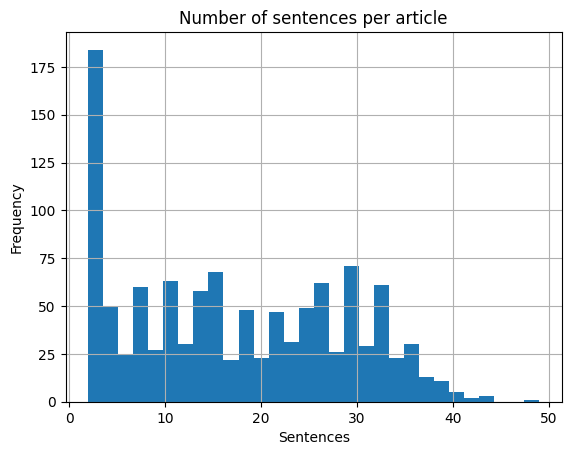

In [2]:
data = pd.read_csv('Data/final_data_with_predictions_new.csv')
group = data.groupby(['URI']).count()

ax = group['Identifier'].hist(bins=30)
ax.set_title('Number of sentences per article')
ax.set_xlabel("Sentences")
ax.set_ylabel("Frequency")

print(f"Average sentences per article: {group['Identifier'].mean():.3f}")

Average articles per event: 15.393


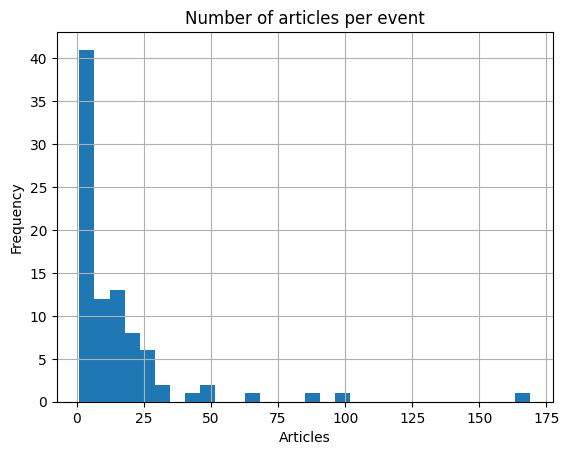

In [5]:
data = pd.read_csv('Data/ASRAEL_data_full.csv')
group = data.groupby(['Event']).count()

ax = group['Identifier'].hist(bins=30)
ax.set_title('Number of articles per event')
ax.set_xlabel("Articles")
ax.set_ylabel("Frequency")

print(f"Average articles per event: {group['Identifier'].mean():.3f}")

In [11]:
group[group['URI'] > 27]

,URI,Identifier,Location,Time,Text
Event,,,,,
http://www.wikidata.org/entity/Q104705419,67,67,67,67,67
http://www.wikidata.org/entity/Q104717056,42,42,42,42,42
http://www.wikidata.org/entity/Q105046769,169,169,169,169,169
http://www.wikidata.org/entity/Q105137806,31,31,31,31,31
http://www.wikidata.org/entity/Q113453221,89,89,89,89,89
http://www.wikidata.org/entity/Q113482948,51,51,51,51,51
http://www.wikidata.org/entity/Q113503169,46,46,46,46,46
http://www.wikidata.org/entity/Q113568279,31,31,31,31,31
http://www.wikidata.org/entity/Q113612174,99,99,99,99,99


In [ ]:
# This is used for evaluating the coreference model
import ast
from resources import node_creation
import pandas as pd

data = pd.read_csv('Data/final_data_with_predictions_new.csv') #Load the original dataset
with open('Data/cluster_data/event_clusters_0.85.txt') as f: #Open the generated cluster file
    cluster_doc = f.readlines()

with open('Data/cluster_data/cluster_0.85_processed.txt', 'w') as output_file:

    for cluster in cluster_doc:
        if cluster.startswith('c'):
            output_file.write(f'{cluster}\n')
            print(cluster)

        if cluster.startswith('['):
            cluster = ast.literal_eval(cluster)

            for mention in cluster:
                mention = mention.split('_')

                sentence = data[(data['URI'] == mention[1]) & (data['Sentence_num'] == int(mention[2]))]['Sentence'].values[0]
                sentence_uri = node_creation('', sentence, base_add='/sentence') #Generate the URI for the sentence

                output_file.write(f"{mention[0]} - {sentence}\n")
                print(f"{mention[0]} - {sentence}\n")

            output_file.write('\n\n')
            print('\n')
output_file.close()

In [11]:
# This is used for evaluating the coreference model
import ast
from resources import node_creation
import pandas as pd

data = pd.read_csv('Data/final_data_with_predictions_new.csv') #Load the original dataset
with open('Data/cluster_data/event_clusters_0.85.txt') as f: #Open the generated cluster file
    cluster_doc = f.readlines()

for cluster in cluster_doc:
    if cluster.startswith('c'):
        print(cluster)

    if cluster.startswith('['):
        cluster = ast.literal_eval(cluster)

        for mention in cluster:
            mention = mention.split('_')

            sentence = data[(data['URI'] == mention[1]) & (data['Sentence_num'] == int(mention[2]))]['Sentence'].values[0]
            sentence_uri = node_creation('', sentence, base_add='/sentence') #Generate the URI for the sentence

            if data[(data['URI'] == mention[1]) & (data['Sentence_num'] == int(mention[2]))]['Subject'].values[0] == mention[0]:
                print("this is a Subject!")

            else:
                print("this is an object")

            print(f"{mention[0]} - {sentence}\n")

        print('\n')

cluster #1

this is an object
confirmed - Thai police have detained the owner of a nightclub in connection with a fire at the venue that killed 15 people, officers confirmed Sunday.



cluster #2

this is a Subject!
issued - A senior police officer in Chonburi province confirmed Sunday that club owner Pongsiri Panprasng had turned himself in after an arrest warrant was issued.



cluster #3

this is an object
confirmed - A senior police officer in Chonburi province confirmed Sunday that club owner Pongsiri Panprasng had turned himself in after an arrest warrant was issued.



cluster #4

this is a Subject!
authorisation - "He remains under detention and police will seek the court's authorisation Monday to detain him while we are investigating," he told AFP.



cluster #5

this is a Subject!
recklessness - The 27-year-old will face several charges, the police officer said, including causing death through recklessness and operating a pub without a licence.



cluster #6

this is an objec

In [9]:
data[(data['URI'] == "http://asrael.eurecom.fr/news/14a190f2-8fdf-3587-aa75-ccae96c552b4") & (data['Sentence_num'] == int(0))]['Object'].values[0]

'confirmed'